<a href="https://colab.research.google.com/github/ind-kum/DEEP-LEARNING-PROJECTS/blob/master/tensorflow_image_classificaiton_kriss_nayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATASETS/dog_vs_cat/train'
valid_path = '/content/drive/MyDrive/DATASETS/dog_vs_cat/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imgenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

  # usefull for g
  folders = glob('/content/drive/MyDrive/DATASETS/dog_vs_cat/train/*')

In [ ]:
folders

['/content/drive/MyDrive/DATASETS/dog_vs_cat/train/dog',
 '/content/drive/MyDrive/DATASETS/dog_vs_cat/train/cat']

In [ ]:
# our layer - you can add more if you want
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# use the image data generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# make sure you provide the same target size as intialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS/dog_vs_cat/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2040 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS/dog_vs_cat/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 600 images belonging to 2 classes.


In [ ]:
# fit the model
# run the cell. it will take some time to excute

history = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
128/128 [==============================] - 690s 5s/step - loss: 0.6822 - accuracy: 0.9564 - val_loss: 0.3183 - val_accuracy: 0.9867
Epoch 2/10
128/128 [==============================] - 296s 2s/step - loss: 0.3790 - accuracy: 0.9809 - val_loss: 0.2249 - val_accuracy: 0.9817
Epoch 3/10
128/128 [==============================] - 297s 2s/step - loss: 0.5280 - accuracy: 0.9770 - val_loss: 0.4398 - val_accuracy: 0.9800
Epoch 4/10
128/128 [==============================] - 295s 2s/step - loss: 0.2377 - accuracy: 0.9902 - val_loss: 0.0204 - val_accuracy: 0.9967
Epoch 5/10
128/128 [==============================] - 293s 2s/step - loss: 0.2100 - accuracy: 0.9858 - val_loss: 0.1138 - val_accuracy: 0.9933
Epoch 6/10
128/128 [==============================] - 296s 2s/step - loss: 0.3052 - accuracy: 0.9892 - val_loss: 0.2505 - val_accuracy: 0.9917
Epoch 7/10
128/128 [==============================] - 298s 2s/step - loss: 0.0518 - accuracy: 0.9971 - val_loss: 0.0904 - val_accuracy: 0.9917

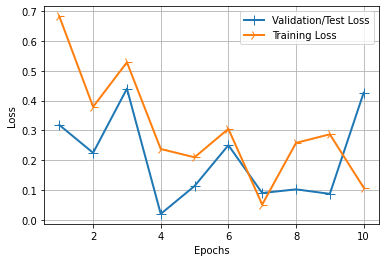

In [ ]:
# plotting out loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

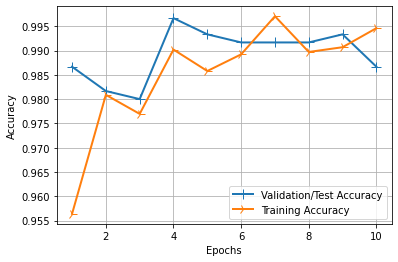

In [ ]:

# Plotting the accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()